In [1]:
#imports
import pandas as pd
from ipywidgets import interact, interactive, fixed, interact_manual, Layout, Box, VBox, HBox, Button, Output, Tab
# import ipywidgets as widgets
from IPython.display import display, display_html
import numpy as np
import math
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm
import markdown
from IPython.core.display import display, HTML
from myst_nb import glue


# Comparing Two (but not more than two) Groups

You can also create content with Jupyter Notebooks. This means that you can include
code blocks and their outputs in your book.

## Quantitative Variables

### Large Samples

The sampling distribution of _any_ statistic (aka value or variable) being tested, e.g., the mean) becomes more and more _normal_ (aka Gaussian or bell-shaped) as the sample size increases (this is the Central Limit Theorem [ADD LINK]). So with sufficiently large samples, we can assume the normality of the sampling distribution required by parametric tests (most well-known statistical tests). In short, large samples make things much easier. 

So what's large?? If in doubt, use the standard rule of thumb, $n>30$. But this oversimplifies things-a lot; parametric tests can sometimes perform well with smaller samples from non-normal data distributions (see [Choosing Between a Nonparametric Test and a Parametric Test](https://blog.minitab.com/en/adventures-in-statistics-2/choosing-between-a-nonparametric-test-and-a-parametric-test) and [ADD LINK]). For simplicity, we'll assume throughout this section that conditions for parametric tests are met. 

Statistics is about application -let's look at some examples.


#### Example: Comparing a sample to the population

__Question:__ Are men taller than the average adult? 

To investigate this quesiton, we could go out and measure *every* man, but that would be awfully inconvenient. So instead we'll analyze the heights (in inches) of a random sample of 50 men {cite}`DConway_2000`. 

In [2]:
##dataset on 10000 measurements of height and weight for men and women available through the book 
##Machine Learning for Hackers, Drew Conway & John Myles-While, O'Reilly Media.
url = "https://raw.githubusercontent.com/johnmyleswhite/ML_for_Hackers/master/02-Exploration/data/01_heights_weights_genders.csv"
df = pd.read_csv(url)

##we take a random sample of 100 males
df_sample = df.loc[df['Gender']== 'Male',['Gender','Height']].sample(50, random_state=12, ignore_index=True);
##prints samples
# pd.set_option('display.max_rows', 50) #NOTE set to 50 and scroll before upload

# df_sample.style.set_properties(**{'horizontal-align': 'right'})
df_sample

,Gender,Height
0,Male,63.651508
1,Male,72.390657
2,Male,69.008259
3,Male,71.357382
4,Male,70.490929
5,Male,69.465859
6,Male,67.110447
7,Male,71.352201
8,Male,67.524328
9,Male,64.815009


,Height
mean,68.929605
std,3.028708
,Height
mean,66.367560
std,3.847528


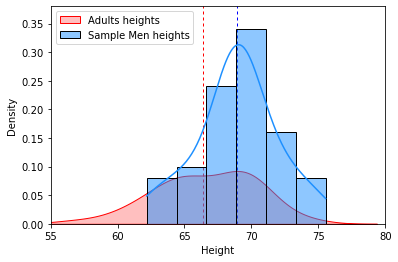

In [3]:
#I'm cheating a little here. Rather than using the actual known mean and std deviation, I'm using a sample of 10,000. 
#It gives the same values as the 'true' values are also found using samples. 
#For the purposes of these examples, we assume these values are established fact.
dfht = df[['Height']]

#display stats side by side
df1_styler = df_sample.describe().loc[['mean','std']].style.set_table_attributes("style='display:inline'").set_caption('Sample Heights of 50 Adult Males')
df2_styler = dfht.describe().loc[['mean','std']].style.set_table_attributes("style='display:inline'").set_caption('Population of Adult Heights')
space = "\xa0" * 10 #adjusts spacing

display_html(df1_styler._repr_html_()+ space +df2_styler._repr_html_(), raw=True)

# Plot
pop_ht = np.random.normal(size=50,loc=66.36756, scale=3.84) #a normal dist adj to Mean and Std

fig, ax = plt.subplots();
sns.kdeplot(pop_ht,color="r", shade = True, label="Adults heights");
sns.histplot(df_sample, x = 'Height', stat = 'probability', kde = True, color="dodgerblue", label="Sample Men heights",bins = 6); 

plt.axvline(x=68.929605, color='b', dashes=(3, 3), zorder=0,linewidth=1);
plt.axvline(x=66.367560, color='red', dashes=(3, 3), zorder=0,linewidth=1);
plt.xlim(55,80)
plt.ylim(0,.38)
plt.legend();

```{figure} data:image/gif;base64,R0lGODlhAQABAIAAAAAAAP///yH5BAEAAAAALAAAAAABAAEAAAIBRAA7
:figclass: caption-hack
:name: your-fig-name

Your caption goes here
```

```{figure} data:image/gif;base64,R0lGODlhAQABAIAAAAAAAP///yH5BAEAAAAALAAAAAABAAEAAAIBRAA7
:figclass: margin
:name: your-fig-name2

Your caption goes here
```

3.003151019541397

2.990532774611404

3.0156704526958613

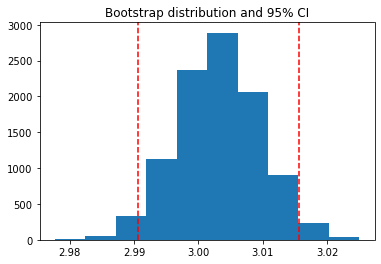

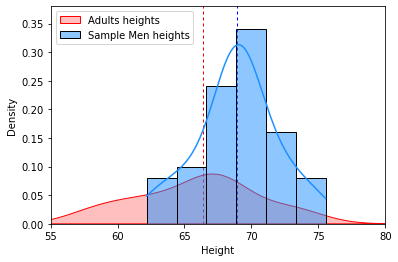

In [4]:
#I'm cheating a little here. Rather than using the actual known mean and std deviation, I'm using a sample of 10,000. 
#It gives the same values as the 'true' values are also found using samples. 
#For the purposes of these examples, we assume these values are established fact.
dfht = df[['Height']]


# display_html(df1_styler._repr_html_()+ space +df2_styler._repr_html_(), raw=True)

# Plot
pop_ht = np.random.normal(size=50,loc=66.36756, scale=3.84) #a normal dist adj to Mean and Std
out1 = Output()
df1 = Output()
df2 = Output()
cap = Output()

with df1:
    display(df_sample.describe().loc[['mean','std']].style.set_table_attributes("style='display:inline'").set_caption('Sample Heights of 50 Adult Males'))

with df2: 
    display(dfht.describe().loc[['mean','std']].style.set_table_attributes("style='display:inline'").set_caption('Population of Adult Heights'))
    
with out1:
    fig, ax = plt.subplots();
    sns.kdeplot(pop_ht,color="r", shade = True, label="Adults heights");
    sns.histplot(df_sample, x = 'Height', stat = 'probability', kde = True, color="dodgerblue", label="Sample Men heights",bins = 6); 
    plt.axvline(x=68.929605, color='b', dashes=(3, 3), zorder=0,linewidth=1);
    plt.axvline(x=66.367560, color='red', dashes=(3, 3), zorder=0,linewidth=1);
    plt.xlim(55,80)
    plt.ylim(0,.38)
    plt.legend()
    # plt.show()

with cap:
    markdown.markdown("""
        {glue:figure} ht-distfig
            :name: square-fig1
        
            newComparing the distributions of the sample (blue) to the population (red) heights.
        """)
    
box_layout = Layout(display='flex',
                    flex_flow='row',
                    align_items = 'center',
                    justify_content = 'space-around',
                    border='solid',
                    width='100%')

box_images = Box(children = [df1, df2, out1],layout=box_layout)
# box_images = Box(children = [display(cap)],layout=box_layout)
# figbox = VBox((out1 ,cap))
# display(figbox)

# box_images

# with cap:
#     strLatex="""
#         \\begin{figure}[b]
#         \centering
#             \includegraphics[totalheight=10.0cm]{%s}
#             \caption{%s}
#             \label{fig:%s}
#         \end{figure}"""%('figname', 'figcaption', 'figlabel') 
# box_caption = Box(children = [cap])
# fig1 = VBox([box_images,box_caption])
# fig1

n_points = 10000
n_boots = 1000
mean, sd = (3, .2)
data = sd*np.random.randn(n_points) + mean
bootstrap_indices = np.random.randint(0, n_points, n_points*n_boots).reshape((n_boots, n_points))
# Calculate the mean of a bunch of random samples
means = data[bootstrap_indices].mean(0)
# Calculate the 95% confidence interval for the mean
clo, chi = np.percentile(means, [2.5, 97.5])
# Store the values in our notebook
glue("boot_mean", means.mean())
glue("boot_clo", clo)
glue("boot_chi", chi)

# Visualize the historgram with the intervals
fig, ax = plt.subplots()
ax.hist(means)
for ln in [clo, chi]:
    ax.axvline(ln, ls='--', c='r')
ax.set_title("Bootstrap distribution and 95% CI")
plt.close(fig)

glue('ht-distfig', fig, display = False)
# box_images;
# display(box_images)

```{glue:figure} ht-distfig
:name: ht-distfig

Comparing the distributions of the sample (blue) to the population (red) heights.
```

```{glue:figure} ht-distfig
:figwidth: 300px
:name: "fig-boot"

This is a **caption**!
```

The population includes women's heights decreadsing the average (this also accounts for the difference in variation; $\sigma\approx 3>s_{x}\approx 3.8$). So as you might have expected, the average height of our sample of males ($\bar{x}\approx 68.9$) exceeds the average of the population ($\mu \approx 66.4$). But this is observation _statistically significant_? Random sampling is random. Perhaps we just happened to select taller than average men. Since our sample was large, intuitively you might expect this likelyhood to be small -but it is possible.

First, assume that our sample was due to chance -and not men being taller. That is, the actual average height is $\mu \leq 66.4$. 

> **Null Hypothesis:** Male average height is less than or equal to 66.4.

Note that the hull hypothesis is exactly the *opposite* of what we want to show -this a proof by contradiction. If the null hypothesis is truen, then our sample came from the colored area of the below graph.  

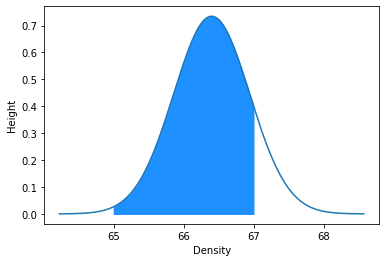

In [5]:

# range = np.arange(-4,4,0.001)
# plt.plot(range, norm.pdf(range, 0, 1))
# plt.show()

# def draw_z_score(x, cond, mu, sigma, title):
#     y = norm.pdf(x, mu, sigma)
#     z = x[cond]
#     plt.plot(x, y)
#     plt.fill_between(z, 0, norm.pdf(z, mu, sigma))
#     plt.title(title)
#     plt.show()
    
#draws pdf of smampling means)
def draw_pdf_smeans(mu, sigma, sample_size, lower_cond, upper_cond):
    sigma_n = sigma/(math.sqrt(sample_size))
    # sigma_n = 1
    x = np.linspace(-4*sigma_n + mu, 4*sigma_n + mu, 1000)
    y = norm.pdf(x, mu, sigma_n) # (x-values, location, scale) 
    # pop_ht = np.random.normal(size=50,loc=66.36756, scale=3.84) #a normal dist adj to Mean and Std
    # z = x['x<67']
    # print(z)
    plt.xlabel('Density')
    plt.ylabel('Height')
    plt.plot(x, y)
    plt.fill_between(x, y, 0, where = (x > lower_cond) & (x < upper_cond),color = 'dodgerblue')
    plt.show()

draw_pdf_smeans(66.4, 3.84, 50, 65, 67)

In [6]:
# %matplotlib notebook
%matplotlib inline

from ipywidgets import interact, FloatSlider, interactive, fixed
import matplotlib.patches as mpatches
from matplotlib.collections import PatchCollection

# style="Simple,head_length=28,head_width=36,tail_width=20"
# arrow = arrow = mpatches.FancyArrowPatch((1,1), (3,3), arrowstyle=style)
# plt.gca().add_patch(arrow)

# plt.plot([1, 3], [1,3], "rx", markersize=15)
# plt.xlim(0, 6)
# plt.ylim(0, 6)
# plt.show()

#draws pdf of smampling means)
def draw_pdf_smeans(mu, sigma, sample_size, lower_cond, upper_cond):
    sigma_n = sigma/(math.sqrt(sample_size)) #std dev of sampling means
    x = np.linspace(-4*sigma_n + mu, 4*sigma_n + mu, 1000) #x-axis values
    y = norm.pdf(x, mu, sigma_n) # (x-values, location, scale) #norm function
    #plot
    fig, axs = plt.subplots()
    plt.plot(x, y)
    plt.fill_between(x, y, 0, where = (x > lower_cond) & (x < upper_cond),color = 'pink')
    plt.axvline(x=66.4, color='red', dashes=(3, 3), zorder=0,linewidth=1)
    plt.axvline(x=lower_cond, color='blue', dashes=(3, 3), zorder=0,linewidth=1)
    plt.xlabel('Density')
    plt.ylabel('Height')
    plt.text(lower_cond+.1,.6, r'$\bar{}=${}'.format(r'x',round(lower_cond,2)), fontsize=12)
    prob = 1-norm.cdf(lower_cond, loc=mu, scale=sigma_n)
    plt.text(67.5,.3, r'prob.={}'.format(round(prob,3)), fontsize=12)
    ##arrows
    style="Simple,head_length=15,head_width=15,tail_width=3"
    arrow = arrow = mpatches.FancyArrowPatch((68,.275), ((lower_cond+68)/2,
                                             norm.pdf((lower_cond+68.75)/2, mu, sigma_n)/2),
                                             arrowstyle=style)
    plt.gca().add_patch(arrow)
    plt.show()
    
## Generate our user interface.
# slider = widgets.FloatSlider(description='Sample mean', 
#                                 style = style, 
#                                 min=64.5, max=68.5, 
#                                 step = 0.1, value=67)

style ={'description_width': 'initial'};
interact_layout = Layout(display='flex',
                    align = 'center',
                    border='solid'
                    )

interactive(draw_pdf_smeans,
         mu = fixed(66.4),
         sigma = fixed(3.84),
         sample_size = fixed(50),
         upper_cond= fixed(66.4+4*3.84),
         lower_cond=FloatSlider(description='Sample mean', 
                                style = style, 
                                min=64.5, max=68.5, 
                                step = 0.1, value=67
                                ),
        );

# display(VBox([w.children[0],w.children[1]]))
#https://stackoverflow.com/questions/45464424/how-to-change-the-default-position-of-a-ipywidget-slider-to-the-side-of-a-matplo
# display(VBox([w.children[0],w.children[1]]))
              

### Small Samples

This is a bit more involved. To be added later...

## Categorical Data

## Code blocks and outputs

MyST markdown works in Jupyter Notebooks as well. For more information about MyST markdown, check
out [the MyST guide in Jupyter Book](https://jupyterbook.org/content/myst.html),
or see [the MyST markdown documentation](https://myst-parser.readthedocs.io/en/latest/).

Jupyter Book will also embed your code blocks and output in your book.
For example, here's some sample Matplotlib code:

In [7]:
from matplotlib import rcParams, cycler
import matplotlib.pyplot as plt
import numpy as np
plt.ion()

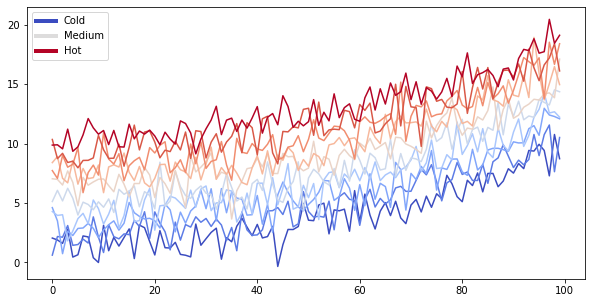

In [8]:
# Fixing random state for reproducibility
np.random.seed(19680801)

N = 10
data = [np.logspace(0, 1, 100) + np.random.randn(100) + ii for ii in range(N)]
data = np.array(data).T
cmap = plt.cm.coolwarm
rcParams['axes.prop_cycle'] = cycler(color=cmap(np.linspace(0, 1, N)))


from matplotlib.lines import Line2D
custom_lines = [Line2D([0], [0], color=cmap(0.), lw=4),
                Line2D([0], [0], color=cmap(.5), lw=4),
                Line2D([0], [0], color=cmap(1.), lw=4)]

fig, ax = plt.subplots(figsize=(10, 5))
lines = ax.plot(data)
ax.legend(custom_lines, ['Cold', 'Medium', 'Hot']);

There is a lot more that you can do with outputs (such as including interactive outputs)
with your book. For more information about this, see [the Jupyter Book documentation](https://jupyterbook.org)

| Name | Gender | Age |
| :--- | :--- | :--- |
| Jack | Male | 32 |
|sue | Female | 21 |

In [9]:
# CSS = """
# .output {
#     align-items: center !important;
# }
# """

# HTML('<style>{}</style>'.format(CSS))


<!-- %%html
<style>
table {float:right}
</style> -->

<!-- %%html
<style>
  table {float:right}
</style> -->